# Problem Statement

"To predict the price of a used car based on its features and characteristics, such as:          
* year               
* selling_price      
* km_driven          
* fuel               
* seller_type        
* transmission       
* owner              
* mileage          
* engine           
* max_power        
* torque           
* seats 

using machine learning algorithms.


" The goal is to develop a model that can accurately predict the price of a used car, given its various features and characteristics, which can be useful for car buyers, sellers, and dealers in making informed decisions.



---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 29.0 MB/s eta 0:00:00
  Created wheel for pandas-profiling: filename=pandas_profiling-0.0.dev0-py2.py3-none-any.whl size=328849 sha256=801c38533f75a0e111e0ac777dae4afb83006eec6b2d74b6ef9281e213a8d341
  Stored in directory: /tmp/pip-ephem-wheel-cache-oouzcm2b/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: file

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
from pandas_profiling import ProfileReport
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Car details v3.csv')

In [ ]:
df_report = ProfileReport(df, minimal=True)
df_report.to_file(output_file='car_detailed_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Cleaning

**Splitting data in columns "mileage", "engine", "max_power", "torque" into float value**

In [55]:
def convert_to_numeric(df):
    cols = ["mileage", "engine", "max_power", "torque"]
    for col in cols:
        df[col] = pd.to_numeric(df[col].str.extract(r"(\d+(?:\.\d+)?)").iloc[:,0], downcast="float")
    return df

# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Car details v3.csv')
df = convert_to_numeric(df)

In [56]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
torque           222
seats            221
dtype: int64

In [57]:
def fill_na_with_mean(df, columns, method='mean'):
    for col in columns:
        if method == 'mean':
            mean = df[col].mean()
            df[col].fillna(mean, inplace=True)
        elif method == 'bfill':
            df[col].fillna(method='bfill', inplace=True)
        elif method == 'ffill':
            df[col].fillna(method='ffill', inplace=True)
    return df

columns = ['mileage', 'engine', 'max_power', 'torque', 'seats']
df = fill_na_with_mean(df, columns, method='mean')


In [58]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [59]:
df.shape

(8128, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float32
 9   engine         8128 non-null   float32
 10  max_power      8128 non-null   float32
 11  torque         8128 non-null   float32
 12  seats          8128 non-null   float64
dtypes: float32(4), float64(1), int64(3), object(5)
memory usage: 698.6+ KB


### Data Exploration

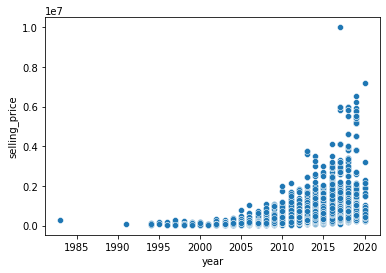

In [61]:
sns.scatterplot(x='year', y='selling_price', data=df)
plt.show()

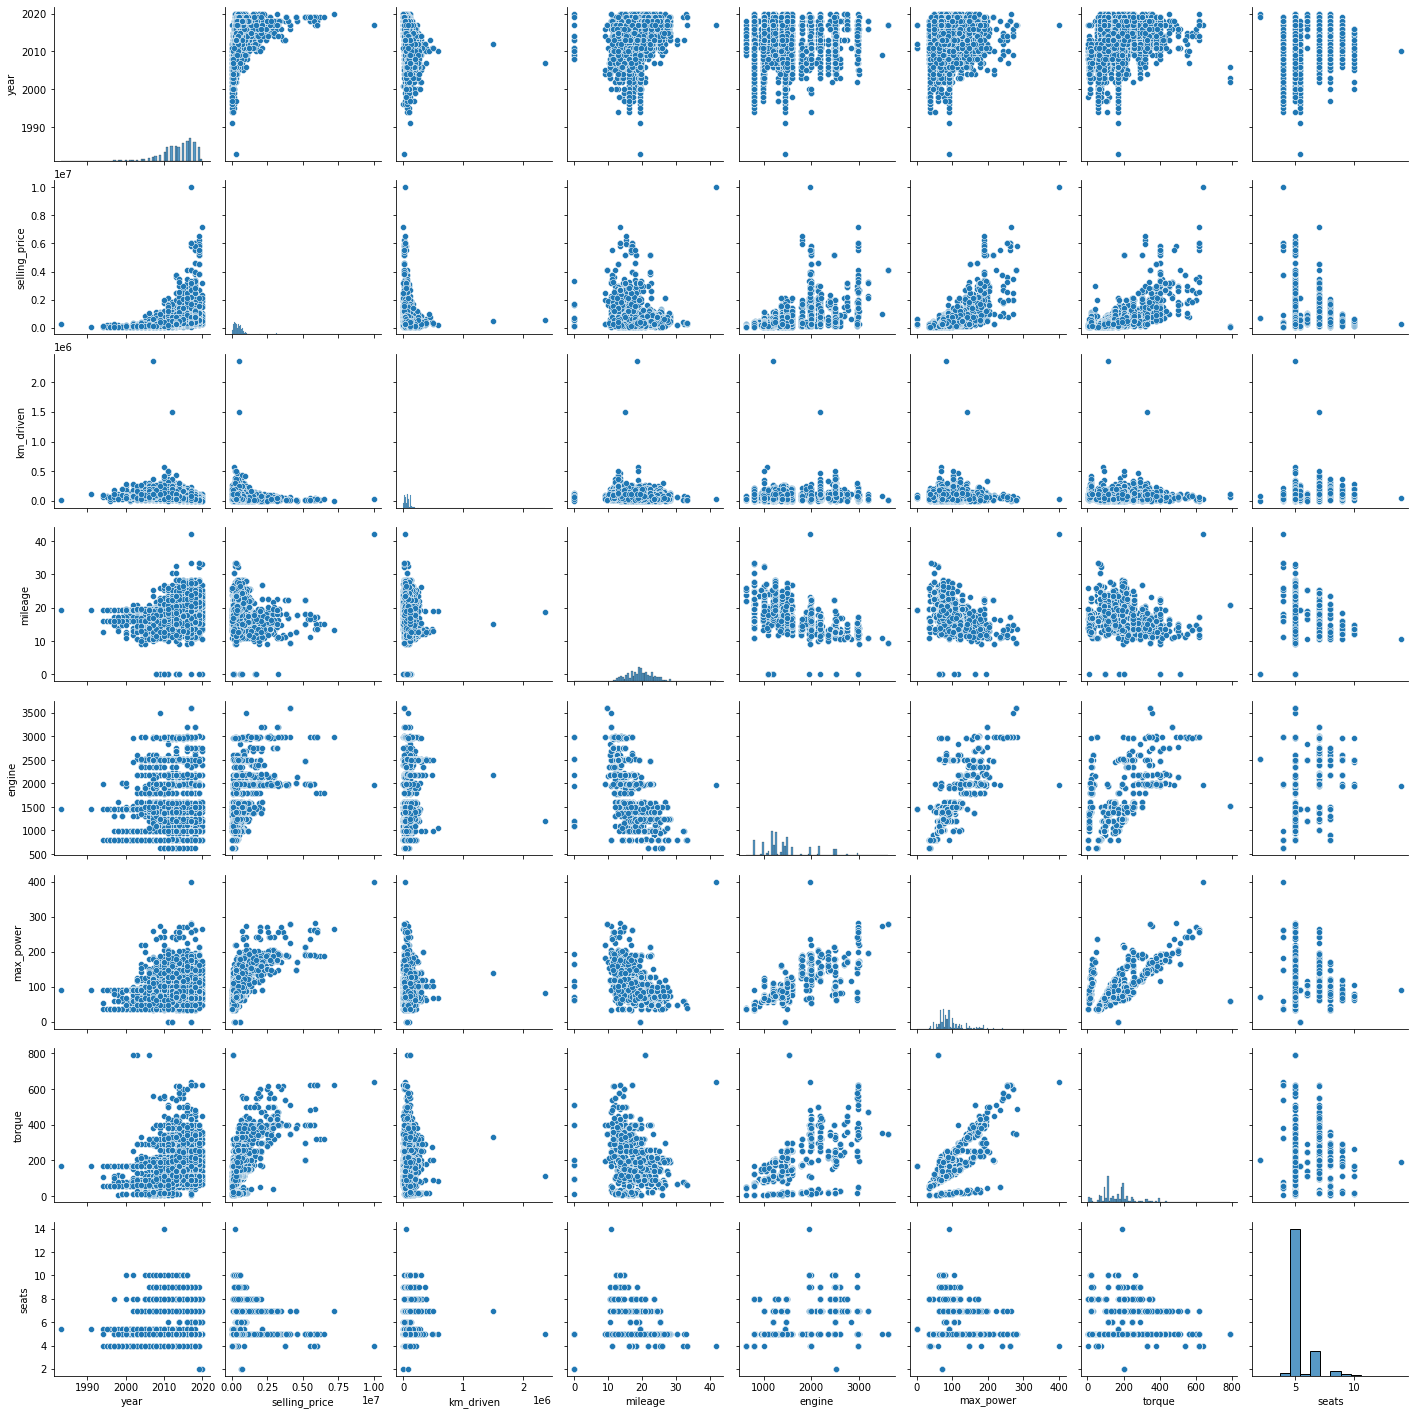

In [62]:
cols = ['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']

sns.pairplot(df[cols])
plt.show()

### **Encoding data** 

In [69]:
df1 = df.copy()

Looking for insight if price correlates with owner and transmission

In [70]:
df1['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [71]:
df1['owner'].replace({'First Owner': 0, 'Second Owner': 1,'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}, inplace=True)
df1['owner_float'] = df1['owner'].astype('float64') 

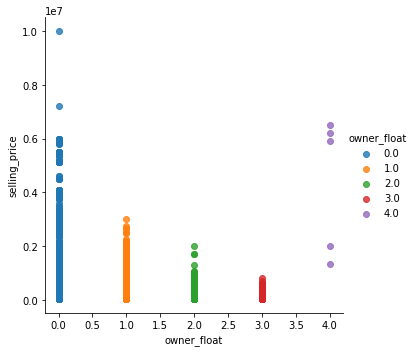

In [72]:
sns.lmplot(x='owner_float',y='selling_price', data=df1,fit_reg=False, hue='owner_float')
plt.show()

Selling Price focar sold by first owner is higher but interestingly test drive cars are higher than fourth and above owner and and there are few cars higher than second onwer and first owner.

In [73]:
df1['transmission'].replace({'Automatic': 1, 'Manual': 0}, inplace=True)
df1['transmission'] = df1['transmission'].astype('float64')  # change to float
# df1_copy['transmission'] = df1_copy['transmission'].astype('int64')  # change to integer
# df1_copy['transmission']

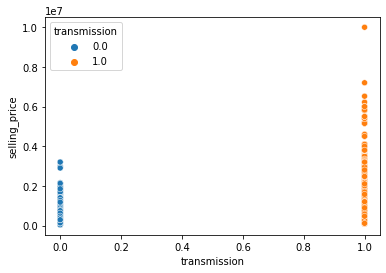

In [74]:
sns.scatterplot(x='transmission',y='selling_price', data=df1, hue='transmission')
plt.show()

Selling price of automatic car is higher than manual car 

In [88]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [89]:
df1['seller_type'].replace({'Individual': 0, 'Dealer': 1, 'Trustmark Dealer':2}, inplace=True)
df1['seller_type'] = df1['seller_type'].astype('float64')

In [95]:
df1.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [96]:
df1['fuel'].replace({'Diesel': 0, 'Petrol': 1, 'LPG':2, 'CNG':3}, inplace=True)
df1['fuel'] = df1['fuel'].astype('float64')

In [97]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,owner_float
0,Maruti Swift Dzire VDI,2014,450000,145500,0.0,0.0,0.0,0,23.400000,1248.0,74.000000,190.0,5.0,0.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0.0,0.0,0.0,1,21.139999,1498.0,103.519997,250.0,5.0,1.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1.0,0.0,0.0,2,17.700001,1497.0,78.000000,12.7,5.0,2.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0.0,0.0,0.0,0,23.000000,1396.0,90.000000,22.4,5.0,0.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1.0,0.0,0.0,0,16.100000,1298.0,88.199997,11.5,5.0,0.0


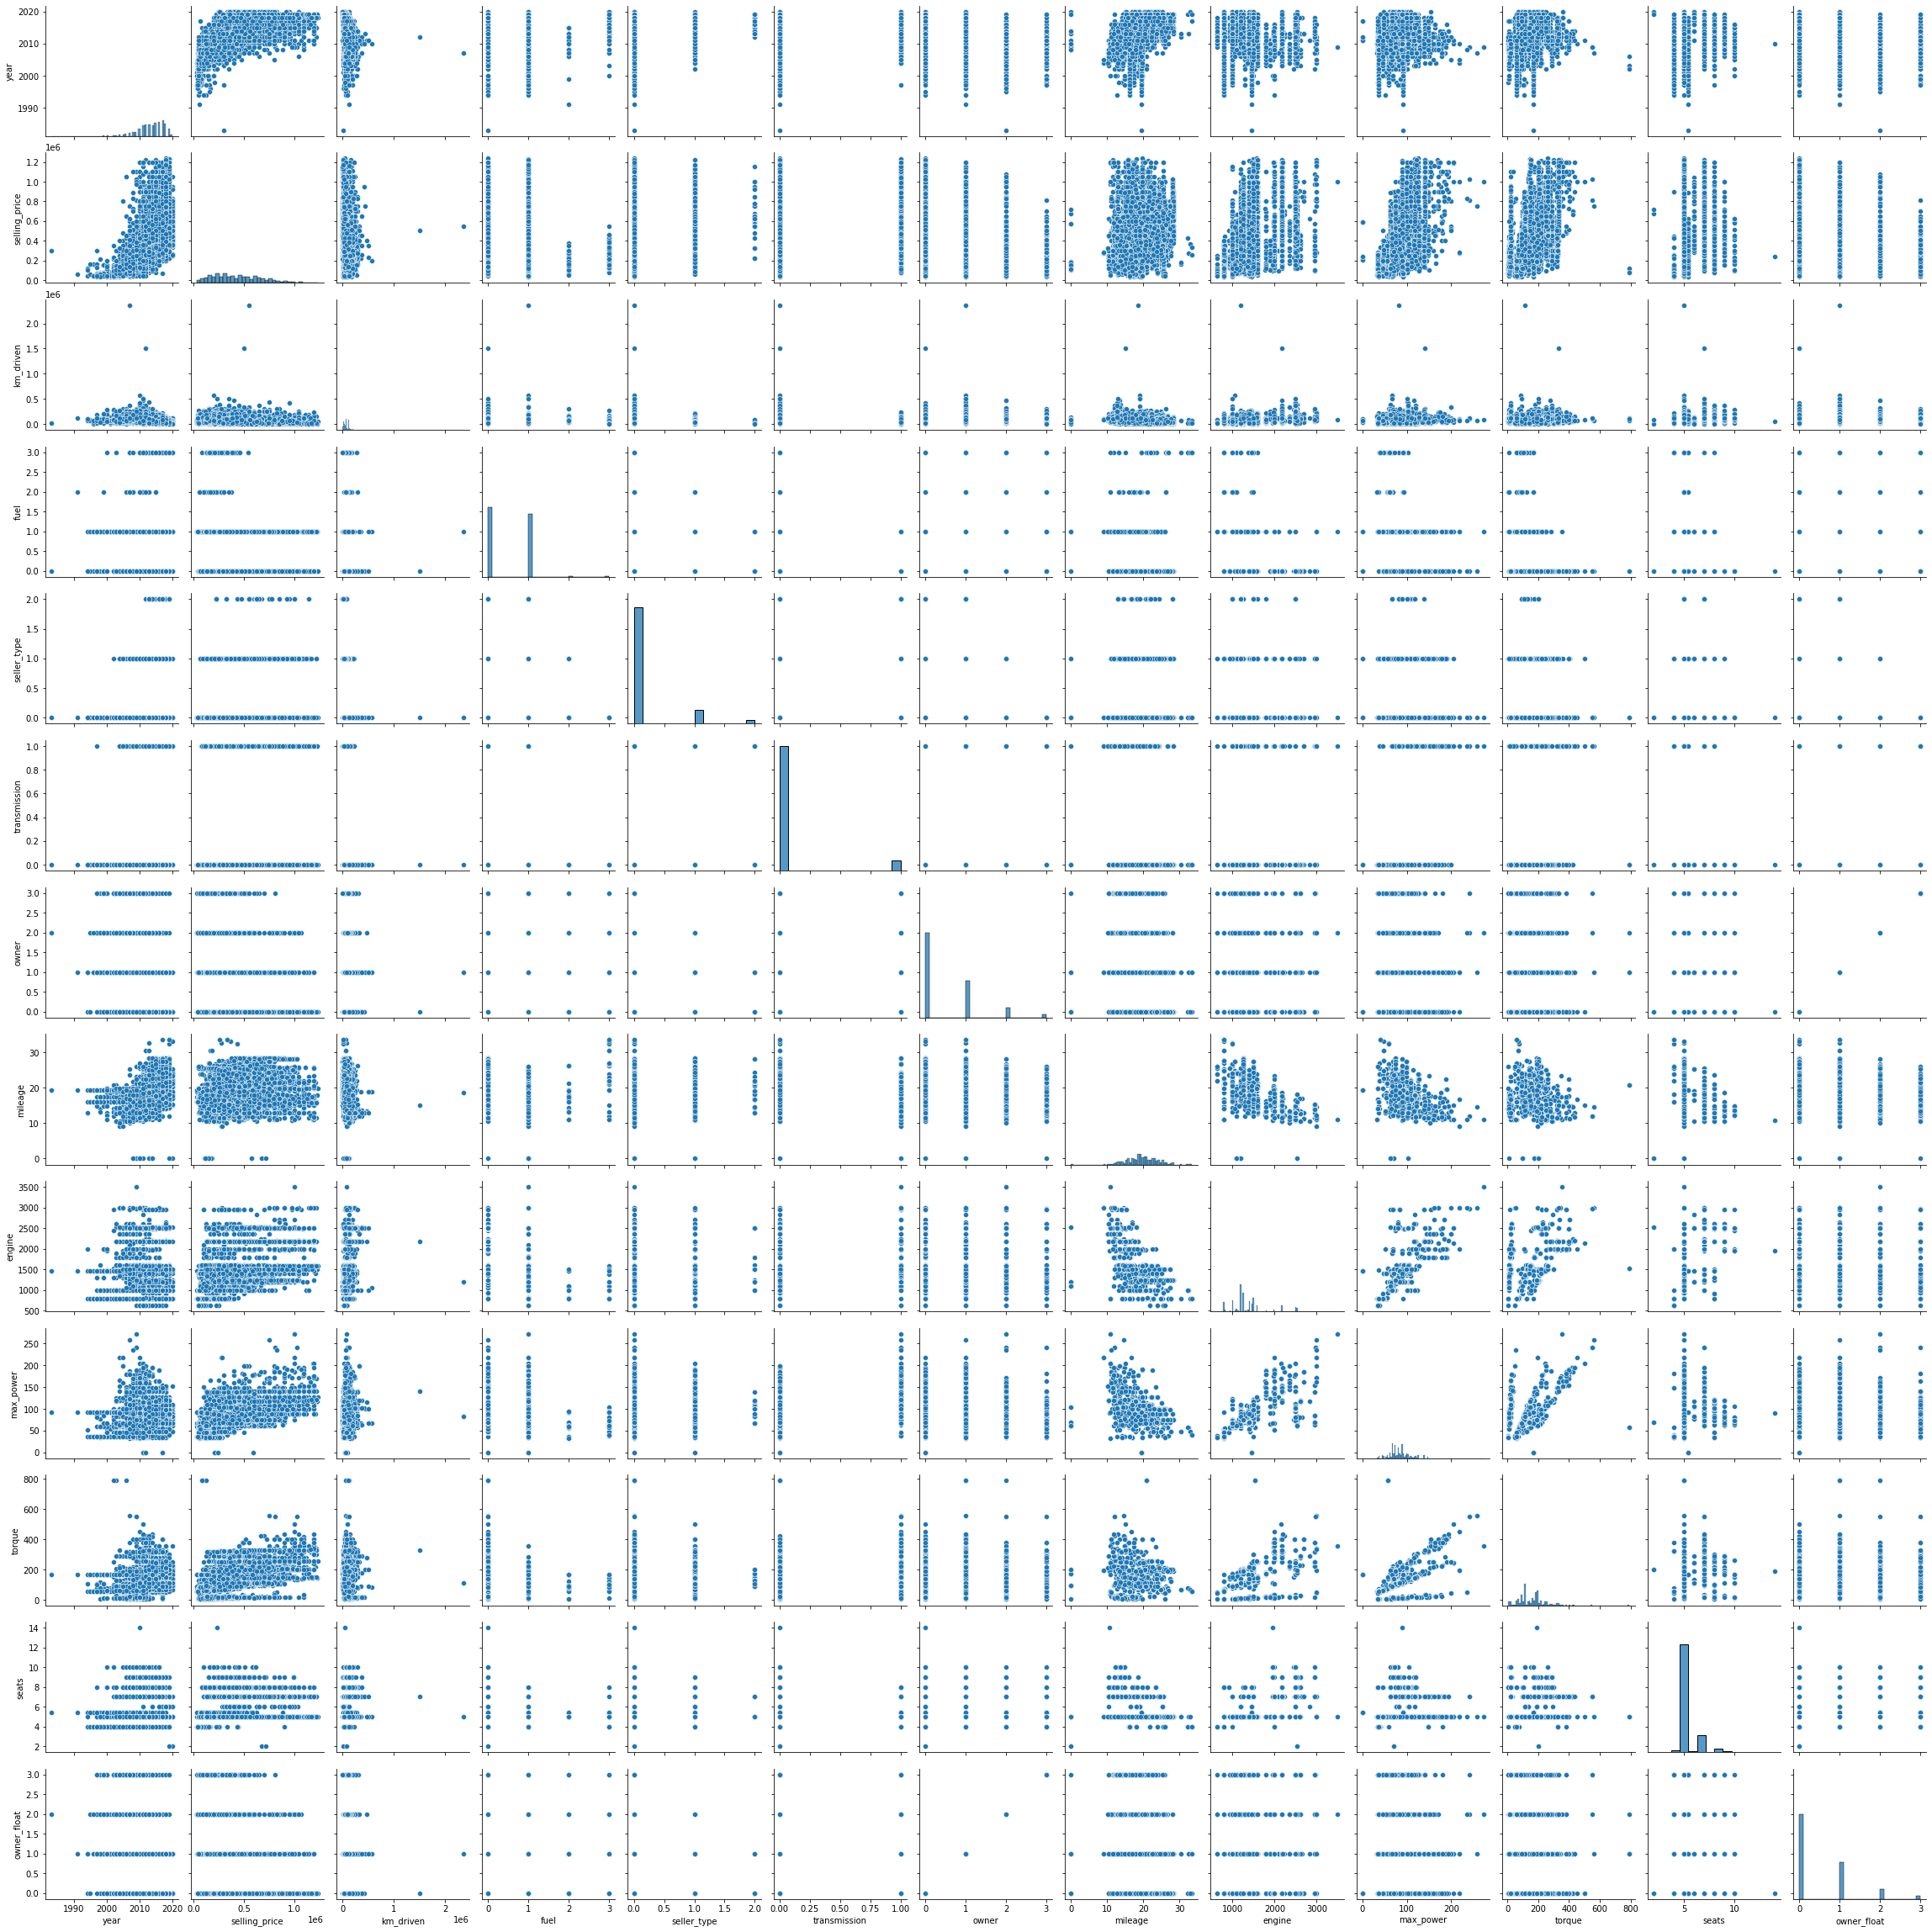

In [98]:
sns.pairplot(df1)
plt.show()

### Checking for Correlation

In [101]:
df1.corr()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,owner_float
year,1.000000,0.644379,-0.389286,-0.017287,0.188520,0.147494,-0.499199,0.393284,-0.097814,0.070066,0.185108,-0.018334,-0.499199
selling_price,0.644379,1.000000,-0.189754,-0.300801,0.207084,0.234823,-0.364078,0.073230,0.355732,0.524436,0.505840,0.230494,-0.364078
km_driven,-0.389286,-0.189754,1.000000,-0.281013,-0.160908,-0.129774,0.269741,-0.217862,0.312607,0.120919,0.124073,0.233448,0.269741
fuel,-0.017287,-0.300801,-0.281013,1.000000,0.055208,0.113636,-0.026330,-0.082147,-0.494940,-0.303463,-0.611176,-0.333509,-0.026330
seller_type,0.188520,0.207084,-0.160908,0.055208,1.000000,0.224525,-0.180652,0.021325,0.005104,0.074725,0.016673,-0.055659,-0.180652
transmission,0.147494,0.234823,-0.129774,0.113636,0.224525,1.000000,-0.090553,-0.079085,0.043381,0.221232,0.058797,-0.066198,-0.090553
owner,-0.499199,-0.364078,0.269741,-0.026330,-0.180652,-0.090553,1.000000,-0.211341,0.077598,-0.008760,-0.078306,0.032506,1.000000
mileage,0.393284,0.073230,-0.217862,-0.082147,0.021325,-0.079085,-0.211341,1.000000,-0.554353,-0.343754,-0.028495,-0.456681,-0.211341
engine,-0.097814,0.355732,0.312607,-0.494940,0.005104,0.043381,0.077598,-0.554353,1.000000,0.629025,0.541347,0.680863,0.077598
max_power,0.070066,0.524436,0.120919,-0.303463,0.074725,0.221232,-0.008760,-0.343754,0.629025,1.000000,0.645739,0.283897,-0.008760


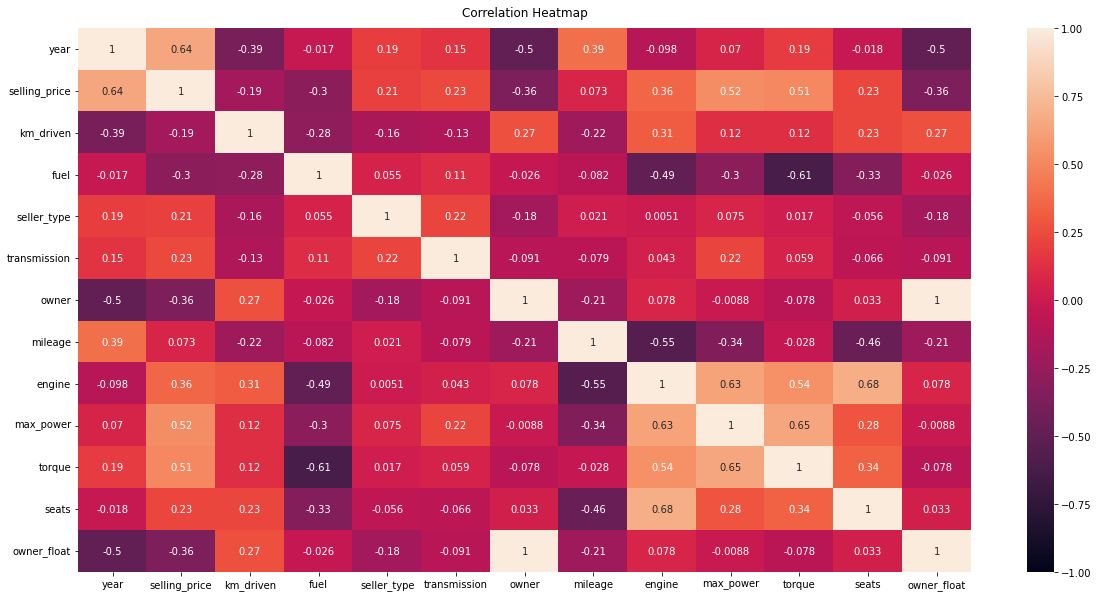

In [104]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Removing outliers

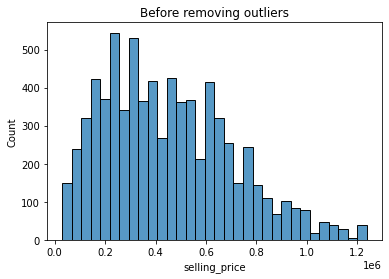

In [105]:
# Plot before removing outliers
sns.histplot(df1['selling_price'], kde=False)
plt.title('Before removing outliers')
plt.show()

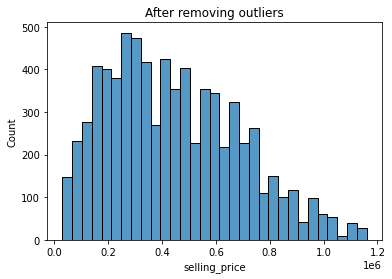

In [106]:
import numpy as np
from scipy import stats

z = np.abs(stats.zscore(df1['selling_price']))
threshold = 3
df1 = df1[(z < threshold)]

Q1 = df1['selling_price'].quantile(0.25)
Q3 = df1['selling_price'].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1['selling_price'] > (Q1 - 1.5 * IQR)) & (df1['selling_price'] < (Q3 + 1.5 * IQR))]

# Plot after removing outliers
sns.histplot(df1['selling_price'], kde=False)
plt.title('After removing outliers')
plt.show()

### Splitting data and target

In [108]:
X = df1[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner_float','seats','torque','engine','mileage']]
y = df1['selling_price']

In [109]:
X.head()

,year,km_driven,fuel,seller_type,transmission,owner_float,seats,torque,engine,mileage
0,2014,145500,0.0,0.0,0.0,0.0,5.0,190.0,1248.0,23.400000
1,2014,120000,0.0,0.0,0.0,1.0,5.0,250.0,1498.0,21.139999
2,2006,140000,1.0,0.0,0.0,2.0,5.0,12.7,1497.0,17.700001
3,2010,127000,0.0,0.0,0.0,0.0,5.0,22.4,1396.0,23.000000
4,2007,120000,1.0,0.0,0.0,0.0,5.0,11.5,1298.0,16.100000


In [110]:
y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

### Splitting training and test data

In [ ]:
# X = pd.get_dummies(X)

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=62)

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
# from sklearn.metrics import precision_score, confusion_matrix

### Training Model

In [112]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, LinearRegression

import numpy as np

In [ ]:
#!pip install xgboost

In [136]:
models = [("Linear Regression", LinearRegression()),
          ("Random Forest", RandomForestRegressor()),
          ("XGBoost", XGBRegressor()),
          ("Lasso Regression", Lasso())]

**Training the model with test data**

In [137]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE={rmse:.2f}, R2={r2:.2f}")


Linear Regression: RMSE=144750.07, R2=0.65
Random Forest: RMSE=79685.97, R2=0.89
[07:15:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost: RMSE=92232.28, R2=0.86
Lasso Regression: RMSE=144750.25, R2=0.65


The Linear Regression model has a RMSE of 144750.07 and R2 score of 0.65, indicating that the model is not very accurate in predicting the target variable.

The Random Forest model has a RMSE of 79685.97 and R2 score of 0.89, indicating that the model is highly accurate in predicting the target variable.

The XGBoost model has a RMSE of 92232.28 and R2 score of 0.86, indicating that it is a highly accurate model for predicting the target variable, compared to the Linear Regression model.

The Lasso Regression model has a RMSE of 144750.25 and R2 score of 0.65, which is similar to the Linear Regression model in terms of accuracy for predicting the target variable.

### Visualise the actual prices and predicted prices

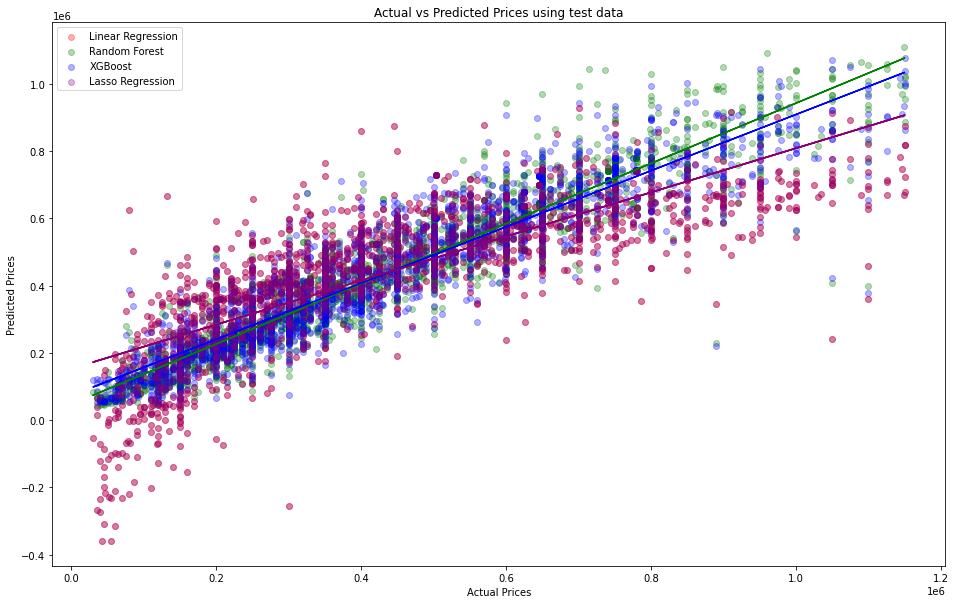

<Figure size 1440x1008 with 0 Axes>

In [145]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

colors = ["red", "green", "blue", "purple"]
plt.figure(figsize=(16, 10))
for i, (name, model) in enumerate(models):
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, c=colors[i], label=name, alpha=0.3)
    m, b = np.polyfit(y_test, y_pred, 1)
    plt.plot(y_test, m*y_test + b, '-', color=colors[i])

plt.title("Actual vs Predicted Prices using test data")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.figure(figsize=(20, 14))
plt.show()

**Training the model with train data**

In [134]:
for name, model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_train)
  mse = mean_squared_error(y_train, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_train, y_pred)
  print(f"{name}: RMSE={rmse:.2f}, R2={r2:.2f}")

Linear Regression: RMSE=143619.53, R2=0.66
Random Forest: RMSE=33521.12, R2=0.98
[07:12:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost: RMSE=89372.12, R2=0.87


The Linear Regression model has a RMSE of 143619.53 and R2 score of 0.66, indicating that the model has a moderate accuracy in predicting the selling price of the used car.

The Random Forest model has a RMSE of 33521.12 and R2 score of 0.98, indicating that the model has a very high accuracy in predicting the selling price of the used car.

The XGBoost model has a RMSE of 89372.12 and R2 score of 0.87, indicating that it is a good model for predicting the selling price of the used car but is not as accurate as the Random Forest model.

### Visualise the actual prices and predicted prices

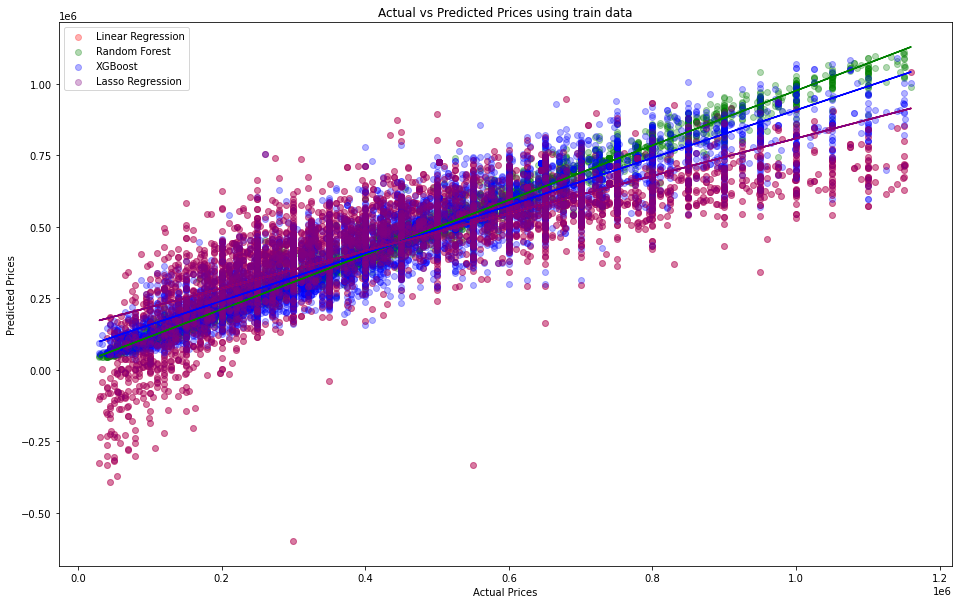

<Figure size 1440x1008 with 0 Axes>

In [144]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

colors = ["red", "green", "blue", "purple"]
plt.figure(figsize=(16, 10))
for i, (name, model) in enumerate(models):
    y_pred = model.predict(X_train)
    plt.scatter(y_train, y_pred, c=colors[i], label=name, alpha=0.3)
    m, b = np.polyfit(y_train, y_pred, 1)
    plt.plot(y_train, m*y_train + b, '-', color=colors[i])

plt.title("Actual vs Predicted Prices using train data")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.figure(figsize=(20, 14))
plt.show()


### Hyperparameter tuning

In [148]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}


rf = RandomForestRegressor()


rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
best_params = rf_random.best_params_
rf_best = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                 max_depth=best_params['max_depth'],
                                 min_samples_split=best_params['min_samples_split'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 max_features=best_params['max_features'])


rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print("Best hyperparameters:", best_params)
print("RMSE:", rmse)
print("R2 score:", r2)


importances = rf_best.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df.sort_values(by="Importance", ascending=False, inplace=True)
print(importance_df)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
RMSE: 77736.08259917068
R2 score: 0.8984801752097382
        Feature  Importance
0          year    0.340541
7        torque    0.225986
8        engine    0.153058
1     km_driven    0.084348
9       mileage    0.080681
5   owner_float    0.039267
6         seats    0.026931
2          fuel    0.025672
4  transmission    0.013833
3   seller_type    0.009683


Based on the output from the hyperparameter tuning, the best hyperparameters for the Random Forest model are n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1, max_features = 'log2', and max_depth = None. With these hyperparameters, the Random Forest model has a Root Mean Squared Error (RMSE) of 77736.08 and an R-squared score of 0.898, indicating that the model has a good fit on the data.



### CONCLUSION

The feature importances show that the year of the vehicle is the most important feature in determining the price, followed by torque, engine, and km_driven. The other features, such as owner_float, seats, fuel, transmission, seller_type, and mileage, have relatively lower importance.

## THE END

---







In [160]:
# from sklearn.model_selection import RandomizedSearchCV

# regressor = XGBRegressor()
# parameters = {'n_estimators': [100, 200, 300],
# 'max_depth': [3, 4, 5],
# 'learning_rate': [0.1, 0.05, 0.01],
# 'colsample_bytree': [0.5, 0.7, 1]}

# random_search = RandomizedSearchCV(regressor, param_distributions=parameters, n_iter=10, n_jobs=-1, cv=5, verbose=2)
# random_search.fit(X_train, y_train)

# best_regressor = random_search.best_estimator_
# y_pred = best_regressor.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)
# print(f"Best XGBoost Model: RMSE={rmse:.2f}, R2={r2:.2f}")

In [159]:
# from sklearn.model_selection import GridSearchCV

# regressor = XGBRegressor()
# parameters = {'n_estimators': [100, 200, 300, 400, 500],
#               'max_depth': [2, 3, 4, 5, 6],
#               'learning_rate': [0.01, 0.05, 0.1],
#               'colsample_bytree': [0.5, 0.7, 1]}

# grid_search = GridSearchCV(regressor, param_grid=parameters, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# best_regressor = grid_search.best_estimator_
# y_pred = best_regressor.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)
# print(f"Best XGBoost Model: RMSE={rmse:.2f}, R2={r2:.2f}")


In [158]:
# # import matplotlib.pyplot as plt


# plt.scatter(y_test, y_pred)
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.show()


In [ ]:
# # # plot the residuals
# residuals = y_test - y_pred
# plt.hist(residuals, bins=50)
# plt.xlabel("Residuals")
# plt.ylabel("Count")
# plt.show()


In [157]:
# colors = ["red", "green", "blue"]

# for i, (name, model) in enumerate(models):
#     y_pred = model.predict(X_test)
#     plt.scatter(y_test, y_pred, c=colors[i], label=name)

# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.legend()
# plt.show()


In [156]:
# import numpy as np
# import matplotlib.pyplot as plt

# colors = ["red", "green", "blue"]

# for i, (name, model) in enumerate(models):
#     y_pred = model.predict(X_test)
#     plt.scatter(y_test, y_pred, c=colors[i], label=name)

#     m, b = np.polyfit(y_test, y_pred, 1)
#     plt.plot(y_test, m*y_test + b, '-', color=colors[i])

# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.legend()
# plt.show()


From the scatter plot, we can see that Random Forest model predictions are closest to the line of best fit and the points are more tightly grouped around the line, indicating a better fit to the data.

In [155]:
# colors = ["red", "green", "blue"]


# for i, (name, model) in enumerate(models):
#     y_pred = model.predict(X_test)
#     residuals = y_test - y_pred
#     plt.scatter(y_test, residuals, c=colors[i], label=name)


# plt.xlabel("True Values")
# plt.ylabel("Residuals")
# plt.legend()
# plt.show()


In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
# from sklearn.preprocessing import StandardScaler

MLP with Relu

In [154]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MLP: RMSE={rmse:.2f}, R2={r2:.2f}")

70/70 [==============================] - 0s 1ms/step
MLP: RMSE=125273.19, R2=0.74


In [153]:
# import matplotlib.pyplot as plt

# plt.scatter(y_test, y_pred)
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.show()


MLP model with Relu

In [152]:
# from keras.layers import Dropout
# from keras.callbacks import EarlyStopping


# model = Sequential()
# model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1))


# model.compile(loss='mean_squared_error', optimizer='adam')
# early_stopping = EarlyStopping(monitor='val_loss', patience=10)
# model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2, callbacks=[early_stopping])

# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)
# print(f"MLP: RMSE={rmse:.2f}, R2={r2:.2f}")


In [151]:
# import matplotlib.pyplot as plt

# plt.scatter(y_test, y_pred)
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.show()


MLP model with LeakyReLU and PReLU activation

In [150]:
# from keras.layers import LeakyReLU, PReLU
# from keras.optimizers import Adamax


# model = Sequential()
# model.add(Dense(128, input_dim=X_train.shape[1], kernel_initializer='normal'))
# model.add(LeakyReLU(alpha=0.01))
# model.add(Dense(64, kernel_initializer='normal'))
# model.add(PReLU())
# model.add(Dense(32, kernel_initializer='normal'))
# model.add(LeakyReLU(alpha=0.01))
# model.add(Dense(1))


# opt = Adamax(learning_rate=0.002)
# model.compile(loss='mean_squared_error', optimizer=opt)

# early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2, callbacks=[early_stopping])

# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)
# print(f"MLP: RMSE={rmse:.2f}, R2={r2:.2f}")


In [149]:
# import matplotlib.pyplot as plt

# plt.scatter(y_test, y_pred)
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.show()
